In [846]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [847]:
#IMPORTING NECESSARY LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [848]:
#checking the versions of the imported libraries
np.__version__,pd.__version__,sns.__version__,matplotlib.__version__

('1.25.2', '2.0.3', '0.12.2', '3.7.2')

LOADING THE DATASET

In [849]:
#loading the data file
df=pd.read_csv('D:\ML\Cars Price Prediction Project\Cars.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [850]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [851]:
df.shape

(8128, 13)

In [852]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [853]:
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [854]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

In [855]:
#converting the column 'name' to 'brand'
df.rename(columns={'name':'brand'}, inplace = True)

In [856]:
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [857]:
df.fuel.unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [858]:
#creating a boolean series from isin()
mask = df['fuel'].isin(['CNG','LPG'])
#select all the rows except cng and lpg
df = df [~mask]
df

#unique values in the fuel column after removal of cng anf lpg
df.fuel.unique()

array(['Diesel', 'Petrol'], dtype=object)

In [859]:
#dropping torque column
df.drop(['torque'], axis=1, inplace = True)

In [860]:
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [861]:
df.dtypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
seats            float64
dtype: object

In [862]:
#replacing the owner values to 1,2,3,4
df['owner'] = df['owner'].replace(
    to_replace=['First Owner', 'Second Owner', 'Third Owner', 'Fourth & Above Owner'],
    value=['1', '2', '3','4'])
df

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,1,18.5 kmpl,1197 CC,82.85 bhp,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,4,16.8 kmpl,1493 CC,110 bhp,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,1,19.3 kmpl,1248 CC,73.9 bhp,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,1,23.57 kmpl,1396 CC,70 bhp,5.0


In [863]:
#changing the data type of 'brand' column to string
#df = df.astype({'brand':'string'})
#df

In [864]:
#shortening the brand name by keeping the first part of the name only
df['brand']=df['brand'].str.split().str[0]
df.head(5)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [865]:
#extracting only the numeric part of the columns and converting to float datatype
df['mileage']= df['mileage'].str.split().str[0].astype(float)
df['engine']= df['engine'].str.split().str[0].astype(float)
df['max_power']= df['max_power'].str.split().str[0].astype(float)

In [866]:
df.dtypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power         object
seats            float64
dtype: object

In [868]:
#max_power error
df['max_power']= df['max_power'].str.split().str[0].astype(float)
df['max_power']

0        74.00
1       103.52
2        78.00
3        90.00
4        88.20
         ...  
8123     82.85
8124    110.00
8125     73.90
8126     70.00
8127     70.00
Name: max_power, Length: 8033, dtype: float64

In [ ]:
#df['max_power'].astype(float)

In [869]:
df.isnull().sum()

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

In [ ]:
#replacing null values with mean() for mileage-221,engine-221,maxpower-216,seats-221
#df['mileage'].fillna((df['mileage'].mean()), inplace=True)
#df['engine'].fillna((df['engine'].mean()), inplace=True)
#df['max_power'].fillna((df['max_power'].mean()), inplace=True)
#df['seats'].fillna((df['seats'].mean()), inplace=True)


In [870]:
df.isnull().sum()

brand              0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          214
engine           214
max_power        208
seats            214
dtype: int64

In [871]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [872]:
y = np.log(df['selling_price'])
df['selling_price']=np.log(df['selling_price'])
df['km_driven']=np.log(df['selling_price'])

df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,13.017003,2.566256,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,12.821258,2.551105,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,11.970350,2.482433,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,12.323856,2.511537,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,11.775290,2.466003,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [873]:
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8033.000000,8033.000000,8033.000000,7819.000000,7819.000000,7825.000000,7819.000000
mean,2013.818748,12.980663,2.561371,19.390375,1463.090677,91.864733,5.421281
std,4.031655,0.839627,0.064683,4.001777,504.655439,35.846839,0.962876
min,1983.000000,10.308919,2.333009,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,12.468437,2.523200,16.780000,1197.000000,69.000000,5.000000
50%,2015.000000,13.017003,2.566256,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,13.429848,2.597480,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,16.118096,2.779943,42.000000,3604.000000,400.000000,14.000000


In [874]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   float64
 3   km_driven      8033 non-null   float64
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   object 
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  seats          7819 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 815.9+ KB


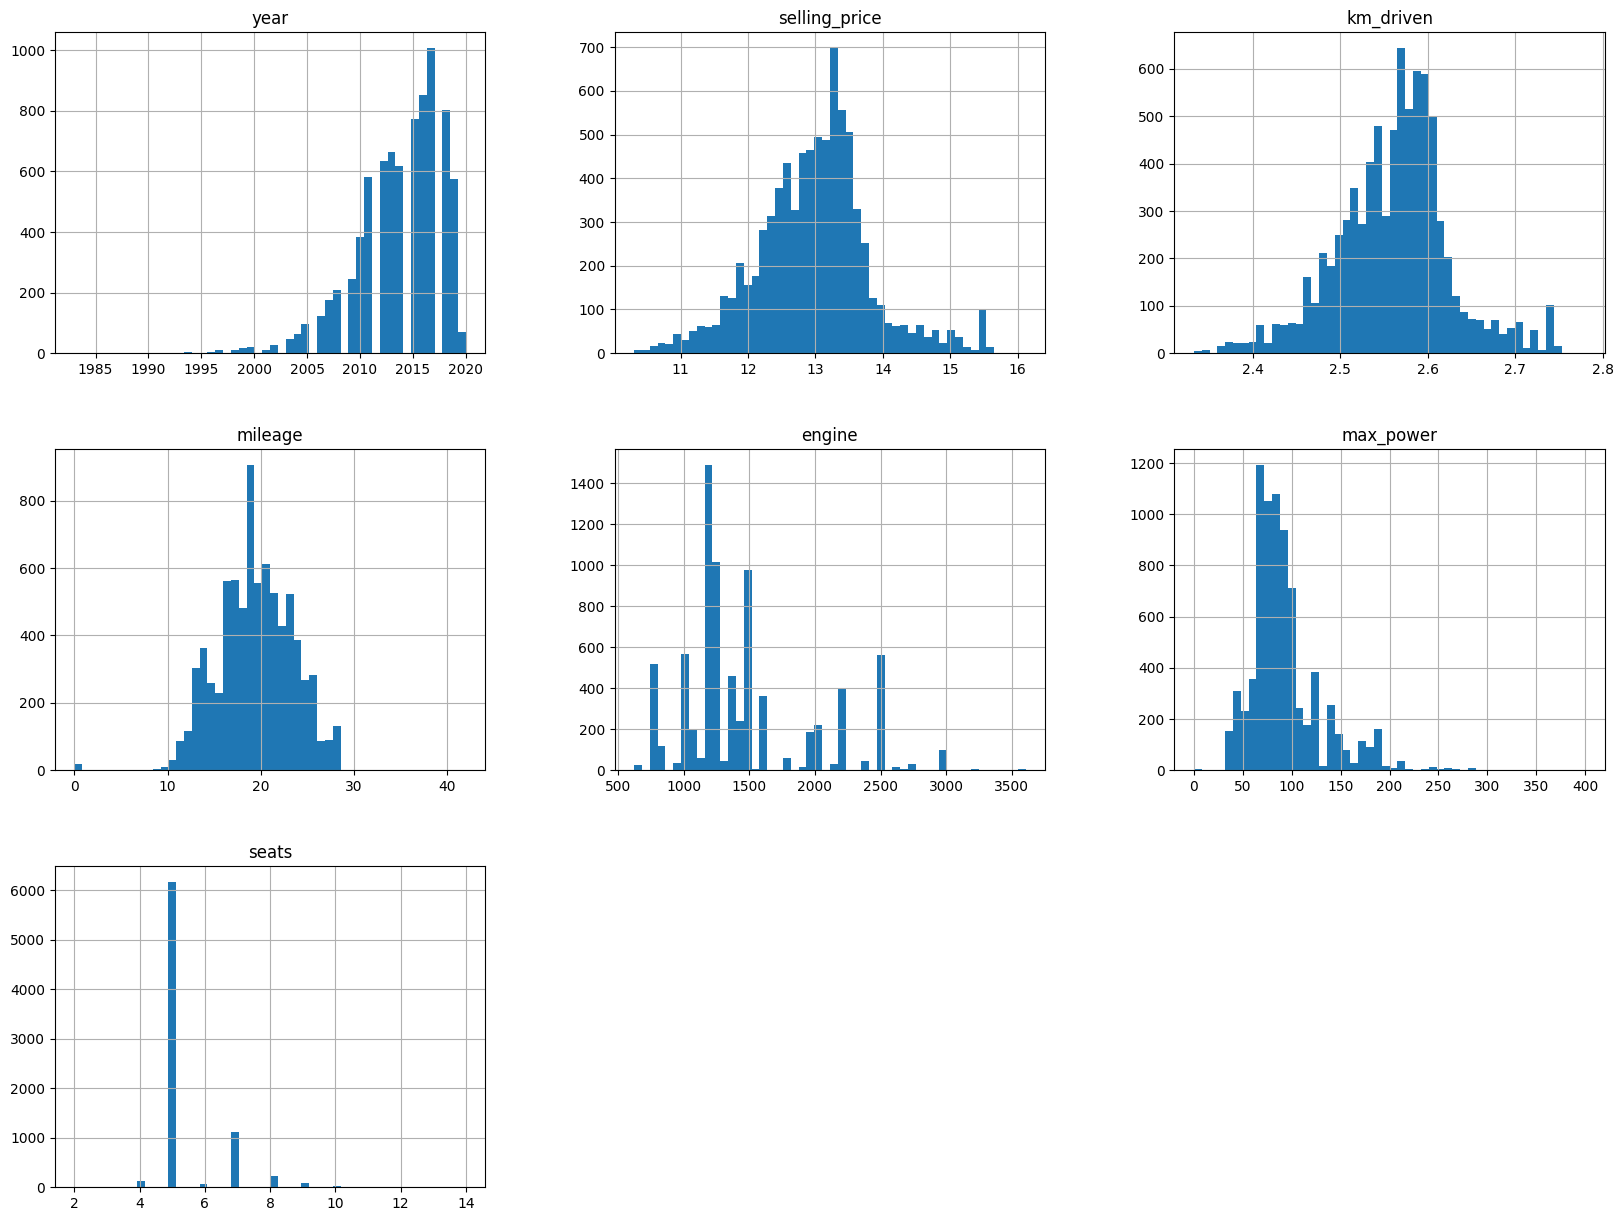

In [875]:
#Plotting Histogram
# plotting histograms for all attributes
df.hist(bins=50, figsize=(20,15))
plt.show()

1. UNIVARIATE ANALYSIS

COUNTPLOT

<Axes: xlabel='brand', ylabel='count'>

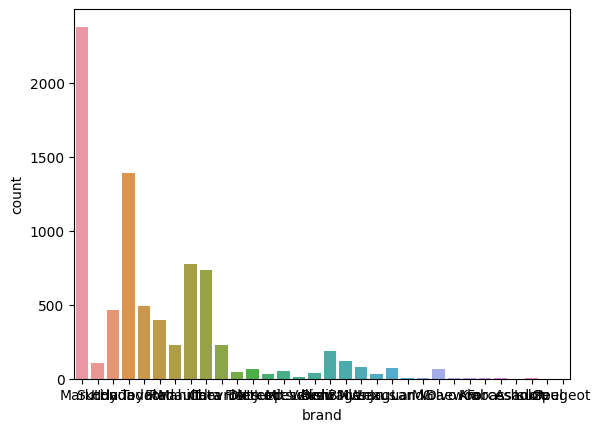

In [876]:
# How many cars of a certain brand?
sns.countplot(data = df, x = 'brand')

Distribution plot

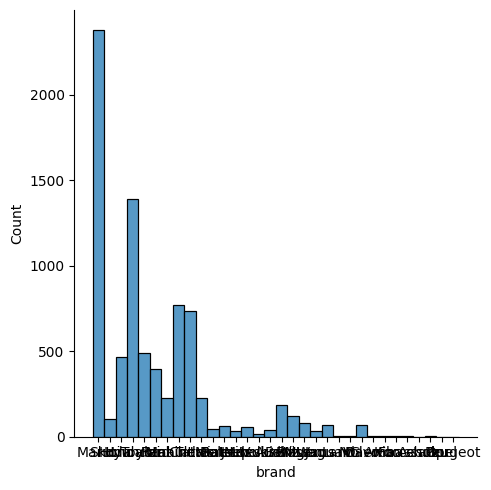

In [877]:
sns.displot(data = df, x = 'brand')

In [878]:
#BIVARIATE ANALYSIS

MULTIVARIATE ANALYSIS

In [879]:
#BOXPLOT

Text(0.5, 0, 'Owner')

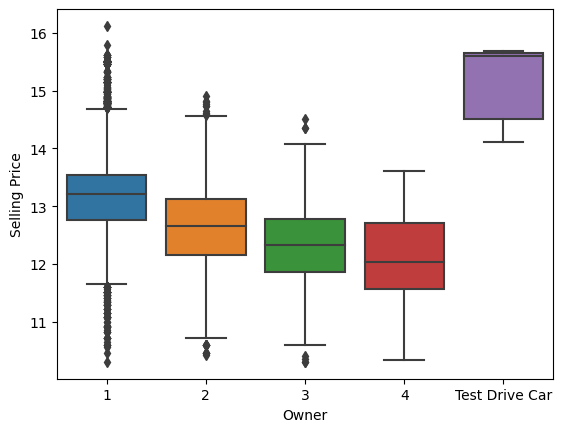

In [880]:
# Let's try bar plot on "Status"
sns.boxplot(x = df["owner"], y = df["selling_price"]);
plt.ylabel("Selling Price")
plt.xlabel("Owner")

Scatterplot

<Axes: xlabel='mileage', ylabel='km_driven'>

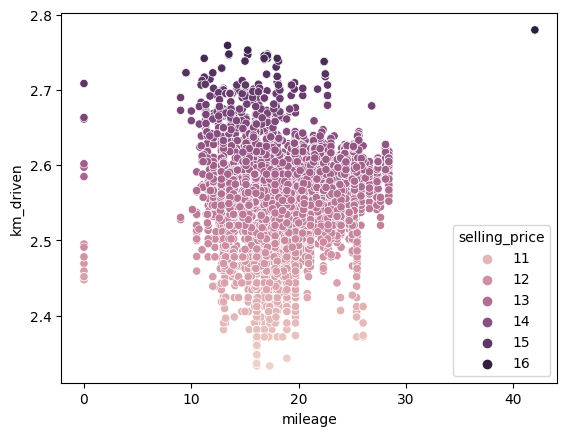

In [881]:
sns.scatterplot(x = df['mileage'], y = df['km_driven'], hue=df['selling_price'])

<Axes: xlabel='selling_price', ylabel='Density'>

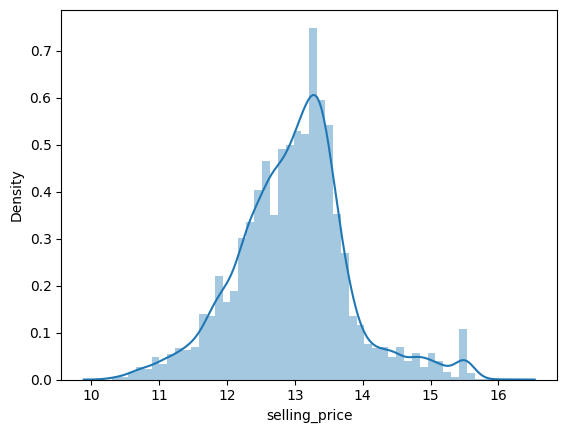

In [882]:
sns.distplot(df['selling_price'])

In [884]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt ='.2f')
plt.show()

ValueError: could not convert string to float: 'Diesel'

In [885]:
uniqueValues = df['max_power'].unique()
uniqueValues

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  37.   ,
        67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,     nan,  67.   ,
        82.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
       121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,  67.05 ,
       168.5  , 100.   , 120.7  ,  98.63 , 175.56 , 103.25 , 171.5  ,
       100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,  86.8  ,
       108.495, 108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,  67.04 ,
        68.05 ,  82.85 ,  81.8  ,  73.   , 120.   ,  94.68 , 160.   ,
        65.   , 155.   ,  69.01 , 126.32 , 138.1  ,  83.8  , 126.2  ,
        98.96 ,  62.1  ,  86.7  , 188.   , 214.56 , 177.   , 280.   ,
       148.31 , 254.79 , 190.   , 177.46 , 204.   , 141.   , 117.6  ,
       241.4  , 282.   , 150.   , 147.5  , 108.5  , 103.5  , 183.   ,
       181.04 , 157.7  , 164.7  ,  91.1  , 400.   ,  68.   ,  75.   ,
        85.8  ,  87.

In [ ]:
#There was an error in converting max_power to float because of a datatype mismatch in the dataframe...converting that to nan, it works! 
#df['max_power'] = df['max_power'].replace('bhp','nan')
#df['max_power'] = df['max_power'].str.split().str[0].astype(float)

In [886]:
df.dtypes

brand             object
year               int64
selling_price    float64
km_driven        float64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

In [888]:
#Heatmap for feature selection
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  #don't forget these are not all variables! categorical is

ValueError: could not convert string to float: 'Diesel'

<Figure size 1500x800 with 0 Axes>

: 

In [ ]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True)  #don't forget these are not all variables! categorical is not 

ValueError: could not convert string to float: 'Diesel'

<Figure size 1500x800 with 0 Axes>

FEATURE SELECTION

TRAIN TEST SPLIT

In [ ]:
#x is our strong features
X = df[['mileage', 'max_power']]

#y is simply the life expectancy col
y = df["selling_price"]


In [ ]:
from sklearn.model_selection import StandardScaler
scaler =StandardScaler()
X_train = scaler.fit_transform()

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5689, 2)
Shape of X_test:  (2439, 2)
Shape of y_train:  (5689,)
Shape of y_test:  (2439,)


In [ ]:
from sklearn.linear_model import LinearRegression  #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

ValueError: could not convert string to float: '19.7 kmpl'